In [7]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Load the data (use your dataset directly here)
data = pd.read_csv("/airline_clnd.csv")  # Replace with your file path

# Check the first few rows
print(data.head())


   SR      id  Gender      Customer_Type  Age   Type_of_Travel     Class  \
0   0   70172    Male     Loyal Customer   13  Personal Travel  Eco Plus   
1   1    5047    Male  disloyal Customer   25  Business travel  Business   
2   2  110028  Female     Loyal Customer   26  Business travel  Business   
3   3   24026  Female     Loyal Customer   25  Business travel  Business   
4   4  119299    Male     Loyal Customer   61  Business travel  Business   

   Flight_Distance  Inflight_wifi_service  Departure/Arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ...  Inflight_entertainment  On-board_service  Leg_room_ser

In [10]:
# Checking for missing values
missing_data = data.isnull().sum()
print("Missing values:\n", missing_data)

# Impute missing values for numerical and categorical features
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])


Missing values:
 SR                                     0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310

In [11]:
# Impute missing values for numerical and categorical features
num_cols = data.select_dtypes(include=["float64", "int64"]).columns
cat_cols = data.select_dtypes(include=["object"]).columns

imputer_num = SimpleImputer(strategy="mean")
imputer_cat = SimpleImputer(strategy="most_frequent")

data[num_cols] = imputer_num.fit_transform(data[num_cols])
data[cat_cols] = imputer_cat.fit_transform(data[cat_cols])

In [12]:
# Encoding categorical features
categorical_features = ["Gender", "Customer_Type", "Type_of_Travel", "Class"]
encoder = OneHotEncoder(drop="first", sparse_output=False)  # Use sparse_output instead of sparse

# Transform and create a DataFrame for encoded features
encoded_features = pd.DataFrame(
    encoder.fit_transform(data[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
)

# Concatenate the encoded features back into the original data
data = pd.concat([data.reset_index(drop=True), encoded_features], axis=1)
data.drop(categorical_features, axis=1, inplace=True)


In [13]:
# Create new feature: Flight_Duration_Category
data["Flight_Distance_Category"] = pd.cut(
    data["Flight_Distance"],
    bins=[0, 500, 1000, 2000],
    labels=["Short", "Medium", "Long"],
)

# Log transform for skewed features (e.g., delays)
data["Log_Departure_Delay"] = np.log1p(data["Departure_Delay_in_Minutes"])
data["Log_Arrival_Delay"] = np.log1p(data["Arrival_Delay_in_Minutes"])


In [14]:
# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[num_cols])

scaled_features_df = pd.DataFrame(scaled_features, columns=num_cols)
data = pd.concat([data.reset_index(drop=True), scaled_features_df], axis=1)


In [15]:
# Encode satisfaction column
data["satisfaction"] = data["satisfaction"].apply(
    lambda x: 1 if x == "satisfied" else 0
)


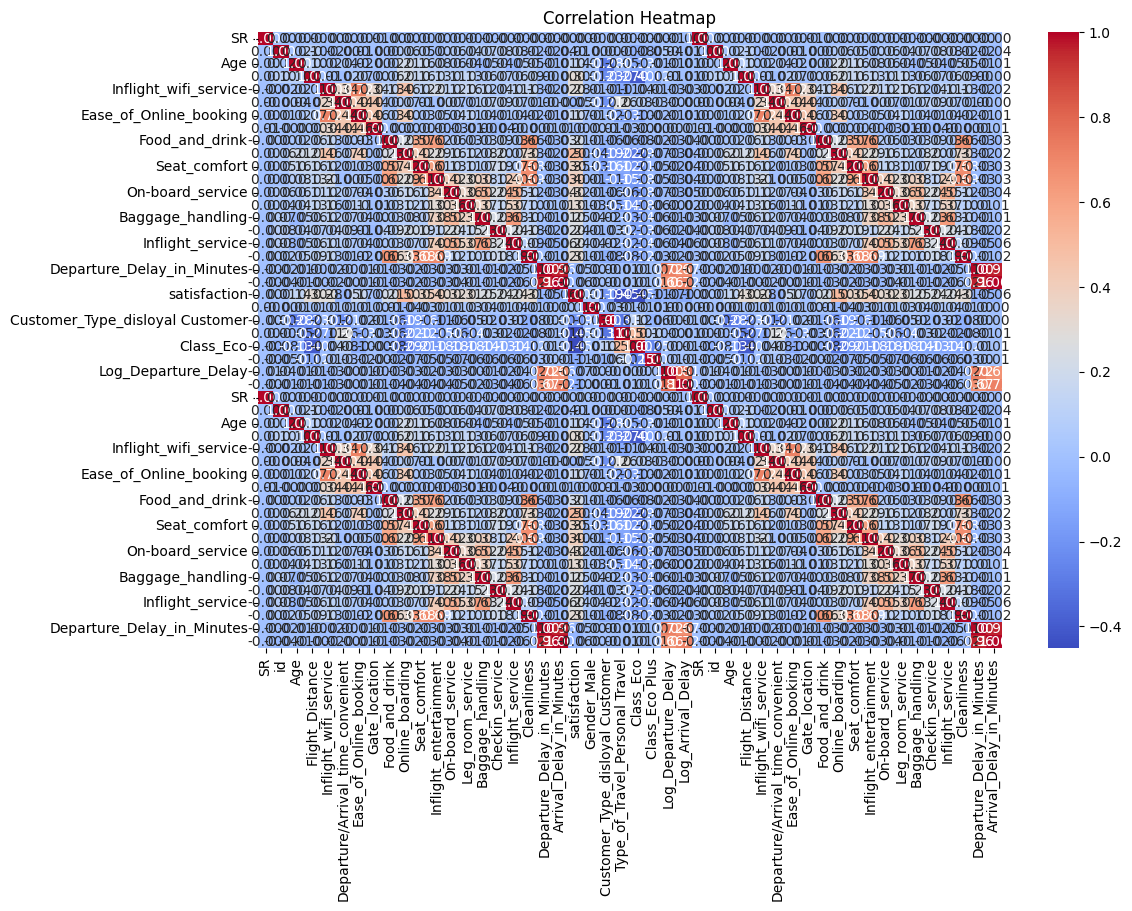

In [16]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=["float64", "int64"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



<ipython-input-17-4f97dec8d906>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="satisfaction", palette="viridis")


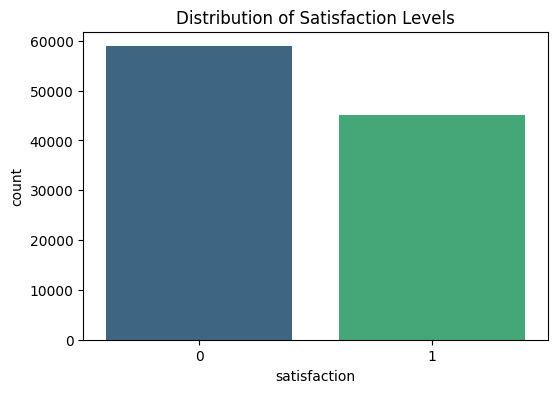

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="satisfaction", palette="viridis")
plt.title("Distribution of Satisfaction Levels")
plt.show()


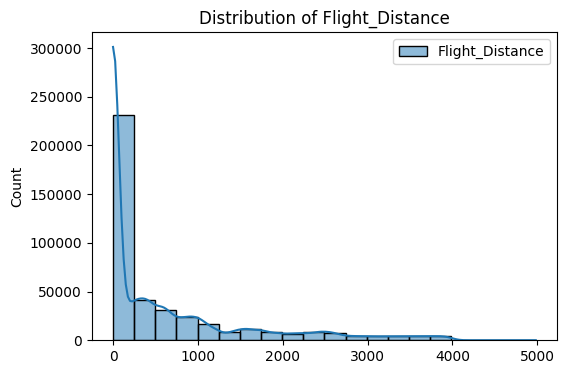

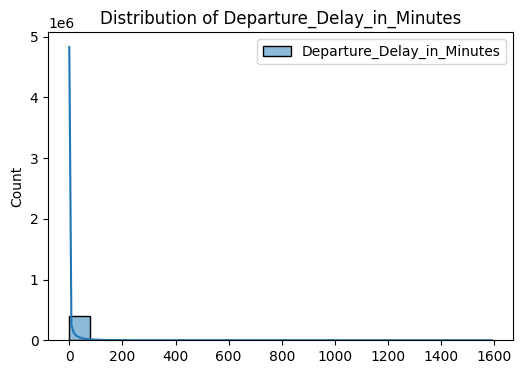

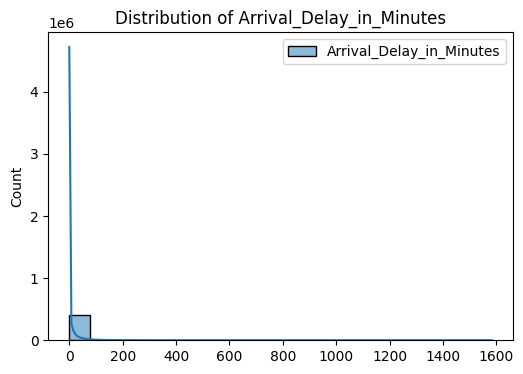

In [18]:
num_features = ["Flight_Distance", "Departure_Delay_in_Minutes", "Arrival_Delay_in_Minutes"]

for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()


In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="satisfaction", y="Departure_Delay_in_Minutes", palette="coolwarm")
plt.title("Departure Delay by Satisfaction")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=data, x="satisfaction", y="Arrival_Delay_in_Minutes", palette="coolwarm")
plt.title("Arrival Delay by Satisfaction")
plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (103904, 2) instead

<Figure size 600x400 with 0 Axes>

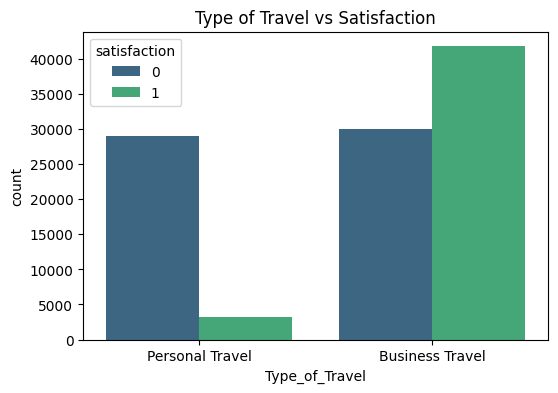

In [22]:
# Map encoded values back to original categories for plotting
data['Type_of_Travel'] = data['Type_of_Travel_Personal Travel'].map({0: 'Business Travel', 1: 'Personal Travel'})

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Type_of_Travel", hue="satisfaction", palette="viridis")
plt.title("Type of Travel vs Satisfaction")
plt.show()


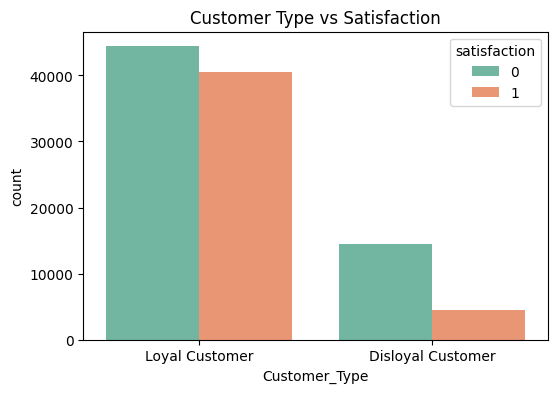

In [23]:
# Map encoded values back to original categories for plotting
data['Customer_Type'] = data['Customer_Type_disloyal Customer'].map({0: 'Loyal Customer', 1: 'Disloyal Customer'})

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x="Customer_Type", hue="satisfaction", palette="Set2")
plt.title("Customer Type vs Satisfaction")
plt.show()


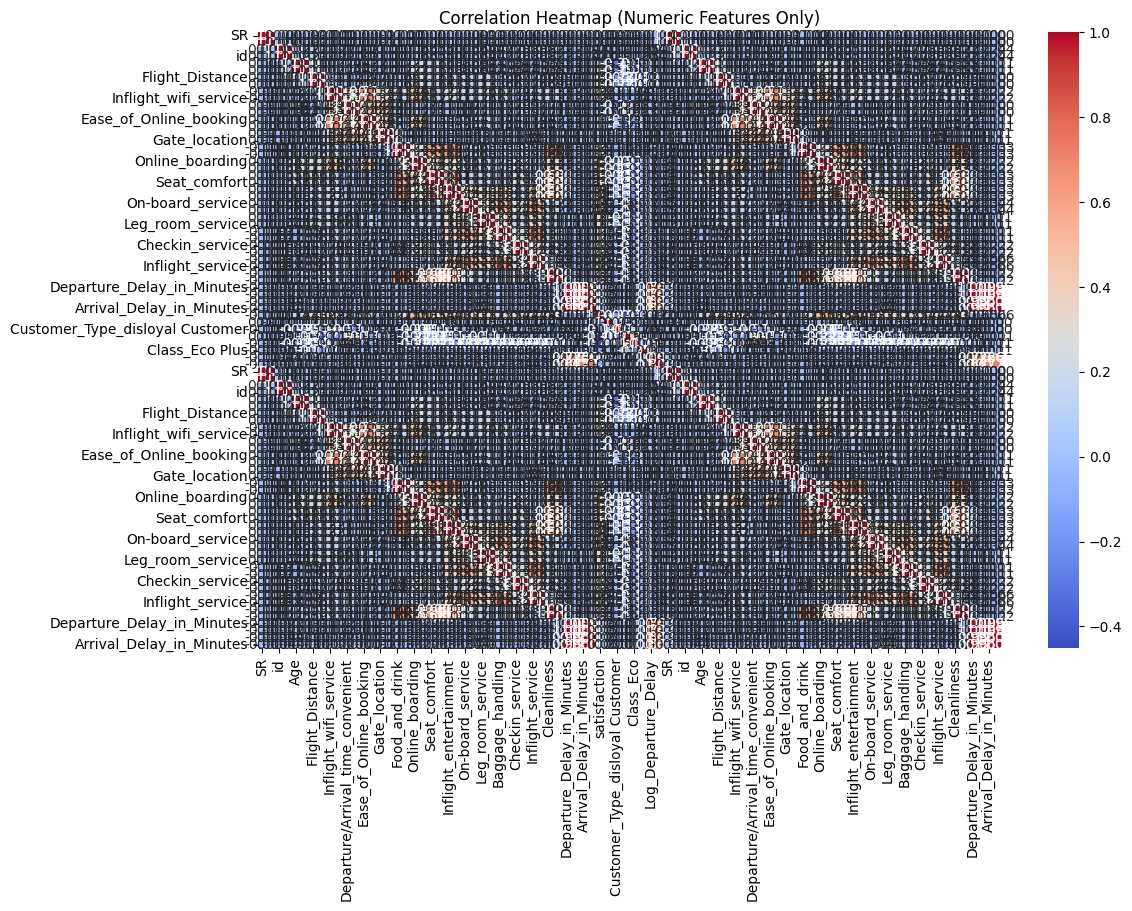

In [24]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=["float64", "int64"]).columns

# Compute and plot the correlation heatmap
correlation_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [33]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [34]:
# Features (X) and Target (y)
X = data.drop(["satisfaction", "id"], axis=1)
y = data["satisfaction"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
print(X_train.dtypes)


SR                                    float64
Age                                   float64
Flight_Distance                       float64
Inflight_wifi_service                 float64
Departure/Arrival_time_convenient     float64
Ease_of_Online_booking                float64
Gate_location                         float64
Food_and_drink                        float64
Online_boarding                       float64
Seat_comfort                          float64
Inflight_entertainment                float64
On-board_service                      float64
Leg_room_service                      float64
Baggage_handling                      float64
Checkin_service                       float64
Inflight_service                      float64
Cleanliness                           float64
Departure_Delay_in_Minutes            float64
Arrival_Delay_in_Minutes              float64
Gender_Male                           float64
Customer_Type_disloyal Customer       float64
Type_of_Travel_Personal Travel    

In [28]:
# Encode 'Type_of_Travel'
X_train['Type_of_Travel'] = X_train['Type_of_Travel'].map({'Business Travel': 0, 'Personal Travel': 1})
X_test['Type_of_Travel'] = X_test['Type_of_Travel'].map({'Business Travel': 0, 'Personal Travel': 1})

# Encode 'Customer_Type'
X_train['Customer_Type'] = X_train['Customer_Type'].map({'Loyal Customer': 0, 'Disloyal Customer': 1})
X_test['Customer_Type'] = X_test['Customer_Type'].map({'Loyal Customer': 0, 'Disloyal Customer': 1})


In [29]:

X_train = X_train.drop(columns=["Flight_Distance_Category"])
X_test = X_test.drop(columns=["Flight_Distance_Category"])


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     11713
           1       0.85      0.81      0.83      9068

    accuracy                           0.85     20781
   macro avg       0.85      0.85      0.85     20781
weighted avg       0.85      0.85      0.85     20781



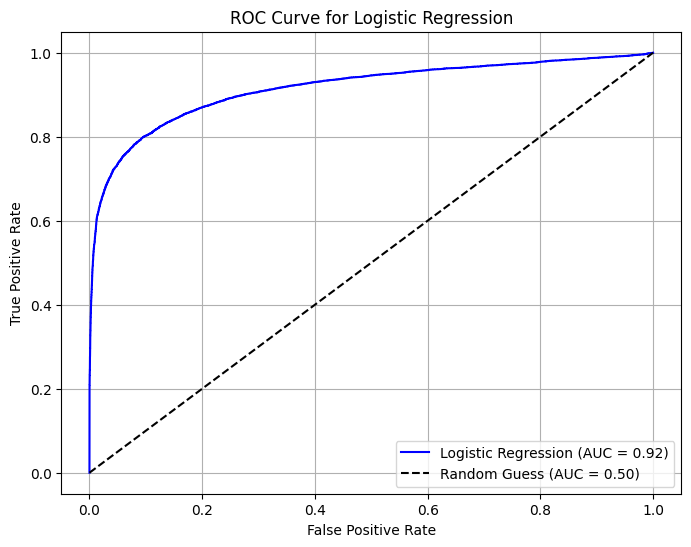

In [30]:
# Fit Logistic Regression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# Metrics
print("Logistic Regression Metrics")
print(classification_report(y_test, y_pred_log))

# ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Random Forest Metrics
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



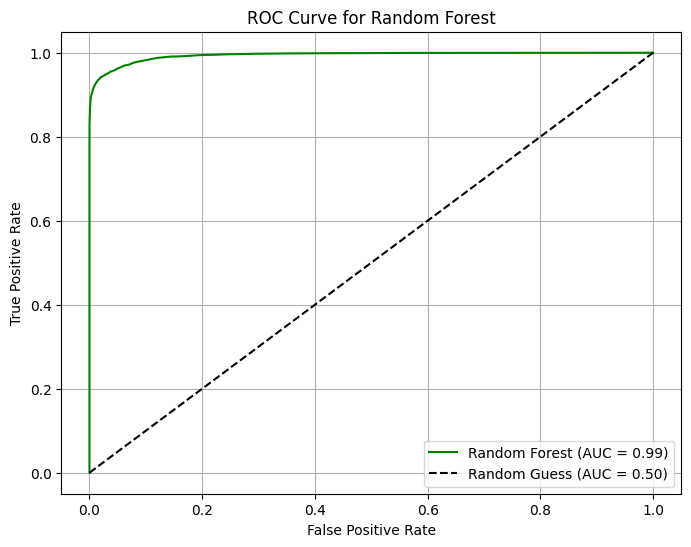

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest Metrics")
print(classification_report(y_test, y_pred_rf))

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color="green", label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Decision Tree Metrics
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     11713
           1       0.94      0.94      0.94      9068

    accuracy                           0.95     20781
   macro avg       0.95      0.95      0.95     20781
weighted avg       0.95      0.95      0.95     20781



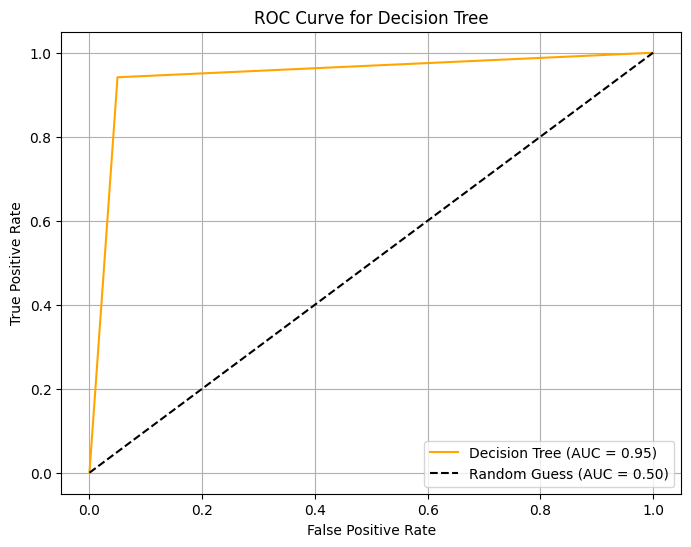

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Metrics
print("Decision Tree Metrics")
print(classification_report(y_test, y_pred_dt))

# ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color="orange", label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [35]:
from sklearn.svm import SVC

# Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Metrics
print("SVM Metrics")
print(classification_report(y_test, y_pred_svm))

# ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color="red", label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for SVM")
plt.legend(loc="lower right")
plt.grid()
plt.show()


ValueError: could not convert string to float: 'Long'

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Metrics
print("k-NN Metrics")
print(classification_report(y_test, y_pred_knn))

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color="purple", label=f"k-NN (AUC = {roc_auc_knn:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for k-NN")
plt.legend(loc="lower right")
plt.grid()
plt.show()


ValueError: Input contains NaN

NameError: name 'fpr_svm' is not defined

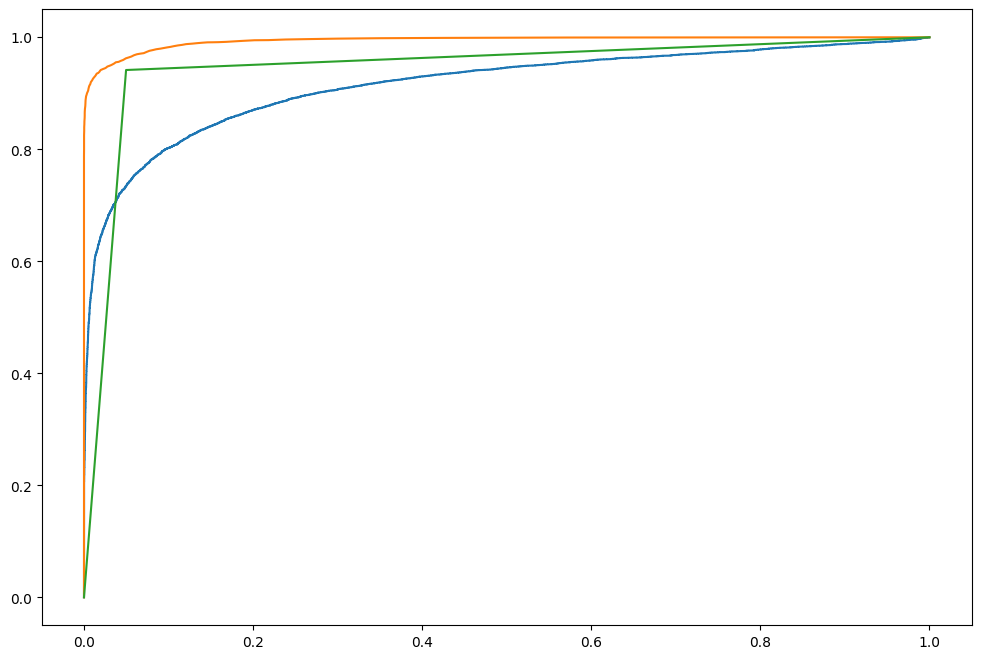

In [38]:
plt.figure(figsize=(12, 8))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")

# Decision Tree
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {roc_auc_dt:.2f})")

# SVM
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")

# k-NN
plt.plot(fpr_knn, tpr_knn, label=f"k-NN (AUC = {roc_auc_knn:.2f})")

# Random Guess
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.50)")

# Plot Settings
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models")
plt.legend(loc="lower right")
plt.grid()
plt.show()
